# ASTR 21100 

# *"Computational Techniques in Astrophysics"*

## Instructor: Andrey Kravtsov

### office: ERC 415; email: kravtsov@uchicago.edu
### office hours: Tue, 10:30am-noon (unless noted otherwise)

### Teaching Assistants: 
### Dimitrios Tanoglidis (dtanoglidis@uchicaago.edu)
### Georgios Zakharegkas (gzakharegkas@uchicago.edu)

### What we have been talking about so far: 

* computation of distances to distant objects in astronomy
* Taylor expansion of functions and truncation errors
* Roundoff errors
* numerical integration using trapezoidal scheme to compute distances in general cosmological models    

### Today: 

* numerical integration using trapezoidal scheme to compute distances in general cosmological models    
* errors associated with the trapezoidal scheme
* computational performance of the scheme
* plotting results using a good style to produce "publication quality" plots
* using distances computed with the trapezoidal scheme to compute model distance modulus and compare to data
* Romberg integration scheme
* approximation of functions using polynomial expansion (if there will be time left)

Routine implementing trapezoidal integration is below. This is how it should actually be written in good style. 

In [1]:
import numpy as np

In [2]:
def trapzd(func, a, b, hstep):
    """
    function implementing trapezoidal integration scheme using
    numpy vector operations
    
    Parameters:
    -----------------------------------------------------------
    func: python function object
          function to integrate, must take numpy arrays as input
    a, b: floats
          limits of the integral
    hstep: float - the size of step to use 
    
    Returns:
    -------------------------------------------------------------
    value of the estimated int^b_a f(x)dx
    """
    bma = np.abs(b-a)
    
    # check if the input is reasonable and if hstep divides interval into integer # of sub-intervals
    nstep = bma / hstep
    if hstep > bma or hstep <= 0.0 or (not nstep.is_integer()):
        raise ValueError("hstep step error: hstep = %.3g; |b-a| = %.3g"%(hstep, np.abs(b-a)))
      
    if int(nstep) == 1:
        return 0.5*(func(a) + func(b)) * hstep
    else: 
        xd = a + np.arange(nstep) * hstep # np.arange creates a vector of values from 0 to nstep-1
        return (0.5*(func(a) + func(b)) + np.sum(func(xd[1:]))) * hstep


This version will actually be shown in class to make it shorter and more easily displayed and digested.

In [3]:
def trapzd(func, a, b, hstep):
    bma = np.abs(b-a)
            
    nstep = np.int(bma / hstep) 
    if nstep == 1:
        return 0.5*(func(a) + func(b)) * hstep
    else: 
        xd = a + np.arange(nstep) * hstep # np.arange creates a vector of values from 0 to nstep-1
        return (0.5*(func(a) + func(b)) + np.sum(func(xd[1:]))) * hstep


define a "helper" function that integrates function <tt>func</tt> using integration routine <tt>int_func</tt> over interval $[a,b]$ for <tt>ns</tt> different step sizes. 

In [4]:
def compute_integral(func, int_func, a, b, ns):
    nsteps = np.arange(ns) # generate a vector of nstep values from 0 to ns-1
    trint = np.zeros(np.shape(nsteps)[0]) # initialize a vector for integration results for each step size

    bma = b - a
    hsteps = bma / np.power(2., nsteps) # compute vector of corresponding step sizes
    for i, ns in enumerate(nsteps):
        trint[i] = int_func(func, a, b, hsteps[i]) # compute the integral for each step size
     
    return trint, hsteps # return vectors of integration results and step sizes

In [5]:
# integrate sin(x) from a, b - exact integral = cos(a) - cos(b)
a = 0.; b = np.pi
ns = 30

trint, hsteps = compute_integral(np.sin, trapzd, a, b, ns)

fexact = np.cos(a) - np.cos(b)
ferr = np.abs(trint/fexact - 1.)

In [6]:
print(ferr)

[1.00000000e+00 2.14601837e-01 5.19405510e-02 1.28841990e-02
 3.21482811e-03 8.03319515e-04 2.00805680e-04 5.01999079e-05
 1.25498825e-05 3.13746471e-06 7.84365809e-07 1.96091429e-07
 4.90228559e-08 1.22557140e-08 3.06392833e-09 7.65982167e-10
 1.91495597e-10 4.78739270e-11 1.19686483e-11 2.99238412e-12
 7.47957252e-13 1.87627691e-13 4.68514116e-14 1.23234756e-14
 2.44249065e-15 6.66133815e-16 1.77635684e-15 4.88498131e-15
 6.10622664e-15 3.33066907e-16]


As before, we are using <tt>%matplotlib inline</tt> command to tell matplotlib to produce images for the plot and embed them into the notebook. An alternative that adds interactive widgets to the plot is <tt>%matplotlib notebook</tt>.

Other most useful magic commands are described <a href="https://towardsdatascience.com/the-top-5-magic-commands-for-jupyter-notebooks-2bf0c5ae4bb8">here</a>, and a comprehensive list of such commands can be found <a href="https://www.dummies.com/programming/python/common-jupyter-notebook-magic-functions/">here</a>.
    

In [7]:
# use jupyter "magic" command to tell it to embed plot into the notebook 
import matplotlib.pyplot as plt
%matplotlib inline

Another helper routine for generic plots that include a line and (optionally) a set of points.

In [75]:
def plot_line_points(x, y, figsize=6, xlabel=' ', ylabel=' ', col= 'darkslateblue', 
                     xp = None, yp = None, points = False, pmarker='.', pcol='slateblue',
                     legend=None, plegend = None, legendloc='lower right', 
                     plot_title = None, grid=None, figsave = None):
    plt.figure(figsize=(figsize,figsize))
    plt.xlabel(xlabel); plt.ylabel(ylabel)
    # Initialize minor ticks
    plt.minorticks_on()

    if legend:
        plt.plot(x, y, lw = 1., c=col, label = legend)
        if points: 
            if plegend:
                plt.scatter(xp, yp, marker=pmarker, lw = 2., c=pcol, label=plegend)
            else:
                plt.scatter(xp, yp, marker=pmarker, lw = 2., c=pcol)
        plt.legend(frameon=False, loc=legendloc, fontsize=3.*figsize)
    else:
        plt.plot(x, y, lw = 1., c=col)
        if points:
            plt.scatter(xp, yp, marker=pmarker, lw = 2., c=pcol)

    if plot_title:
        plt.title(plot_title, fontsize=3.*figsize)
        
    if grid: 
        plt.grid(linestyle='dotted', lw=0.5, color='lightgray')
        
    if figsave:
        plt.savefig(figsave, bbox_inches='tight')

    plt.show()
    

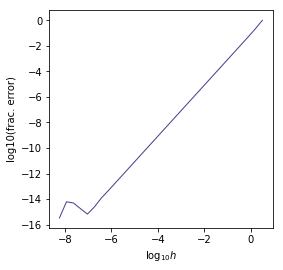

In [9]:
plot_line_points(np.log10(hsteps), np.log10(ferr), xlabel=r'$\log_{10} h$', ylabel=r'log10(frac. error)', figsize=4)

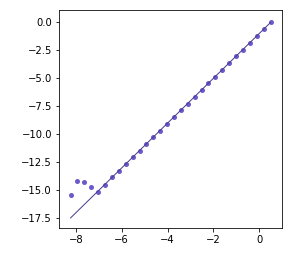

In [10]:
#model is ferr ~ h^2, we normalize it to the size of error for first step size in the sequence:
ferr_model = ferr[1] * (hsteps/hsteps[1])**2

plot_line_points(np.log10(hsteps), np.log10(ferr_model), 
                 xp=np.log10(hsteps), yp=np.log10(ferr), points=True, figsize=4)

In [67]:
def plot_pretty(dpi=175,fontsize=9):
    # import pyplot and set some parameters to make plots prettier
    plt.rc("savefig", dpi=dpi)
    plt.rc("figure", dpi=dpi)
    plt.rc('font', size=fontsize)
    plt.rc('xtick', direction='in') 
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=5) 
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=5) 
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [2., 2.])
    #if you don't have LaTeX installed on your laptop and this statement 
    # generates error, comment it out
    plt.rc('text', usetex=True)

    return

plot_pretty(fontsize=12)

In [61]:
plot_pretty(fontsize=12)

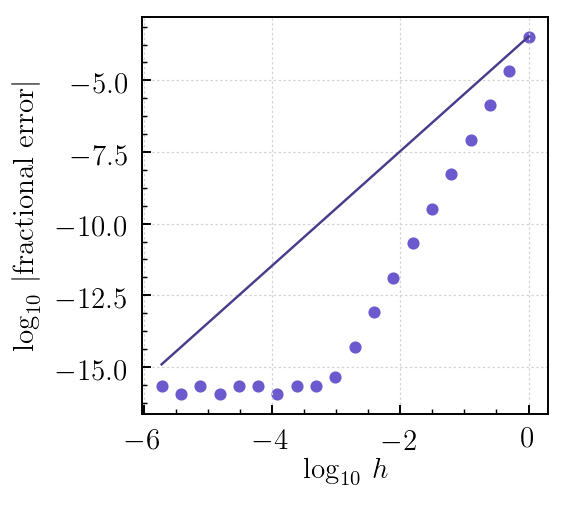

In [68]:
#model is ferr ~ h^2, we normalize it to the size of error for first step size in the sequence:
ferr_model = ferr[0] * (hsteps/hsteps[0])**2

plot_line_points(np.log10(hsteps), np.log10(ferr_model), 
                 xlabel=r'$\log_{10}\,h$', ylabel = r'$\log_{10}\,\vert\rm fractional\ error\vert$',
                 xp=np.log10(hsteps), yp=np.log10(ferr), points=True, grid=True, figsize=3)

### The origin of the "floor" in the fractional error at $\approx 10^{-16}$

This is because <a href="https://en.wikipedia.org/wiki/Double-precision_floating-point_format">a finite number of bits</a> (64) is used to represent floating point numbers in the <a href="https://en.wikipedia.org/wiki/IEEE_754-2008_revision">IEEE-754</a> standard used in Python and other languages:

<img src="img/IEEE_754_Double_Floating_Point_Format.svg"></img>



The spacing between floating numbers around a floating number $x$ will be $\approx 2\varepsilon\vert x\vert\approx 2.2\times 10^{-16}\vert x\vert$. 

*Some floating point numbers can be represented exactly (if they need $\leq 52$ bits to represent their fraction), while many other need to be* **rounded off.** 

Calculations with numbers that can be represented exactly are more accurate, but rounded off numbers are generic and cannot be avoided. 

This limited representable difference is the source of **roundoff errors** in numerical calculations

In [89]:
eps = 1.0 
i = -1 # start at -1 so first iteration will correspond to i=0

while 1.0 + eps != 1.0:
    eps = eps / 2
    i = i + 1

print(i, eps)
print(1.+eps)

52 1.1102230246251565e-16
1.0


In [90]:
# however... I have two floating point numbers like this. Can we get their difference?
a = 1.1e-16; b = 1.05e-16

In [91]:
print(a-b)

4.999999999999995e-18


Python represents numbers using the <a href="https://en.wikipedia.org/wiki/IEEE_754-2008_revision">IEEE-754</a> standard. Additional information about the floating point representation can be found <a href="https://floating-point-gui.de/formats/fp/">here</a>. For an in-depth description of the standard for floating point number representation see this <a href="https://en.wikipedia.org/wiki/Double-precision_floating-point_format">paper.</a>

We can get all of the information about this representation in python as follows 

In [54]:
import sys
print(sys.float_info)

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)


What does this all mean?  The first number shows the largest number that could be represented by the python float. It is defined by the number of bits used to represent the float: 64 on a 64-bit system (often considered as "double precision"). Of these 64 bits, one bit is reserved for sign, 11 bits are reserved for the exponent, and 52 bits for the *mantissa*.

In [92]:
eps = 1.0
i = -1
while eps != 0.:
    eps = eps / 2
    i = i + 1
print(i, eps)

1074 0.0


### Why does the fractional error of the trapezoidal integration scale as $\propto h^2$?

Before we discuss the answer to this question, let's first consider a couple of experiments, results of which are quite striking and may seem puzzling. 

In [94]:
def sin_plus_1(x):
    return np.sin(x) + 1.0

In [95]:
# first, let's redo the integral of sin(x), but with a different 
a = 0.; b = 2.*np.pi 
ns = 5

trint, hsteps = compute_integral(sin_plus_1, trapzd, a, b, ns)

fexact = b - a - np.cos(b) + np.cos(a)
ferr = np.abs(trint/fexact - 1.)

In [27]:
print(fexact, trint)
print(ferr)

6.283185307179586 [6.28318531 6.28318531 6.28318531 6.28318531 6.28318531]
[1.11022302e-16 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]


Trapezoidal routine returns answer *accurate to machine precision* for *all* values of step size!

Then consider the following integration routine that does trapezoidal integration with two steps $h$ and $h/2$ and combines results in a specific way...

In [28]:
def trapzd2(func, a, b, hstep):
    return (4.*trapzd(func, a, b, 0.5*hstep) - trapzd(func, a, b, hstep)) / 3.

In [29]:
# integrate e^x from a, b - exact integral = e^b - e^a
a = 0; b = 1
ns = 20

fexact = np.exp(b) - np.exp(a)
print(fexact)
trint, hsteps = compute_integral(np.exp, trapzd2, a, b, ns)

ferr = np.abs(trint/fexact - 1.)

1.718281828459045


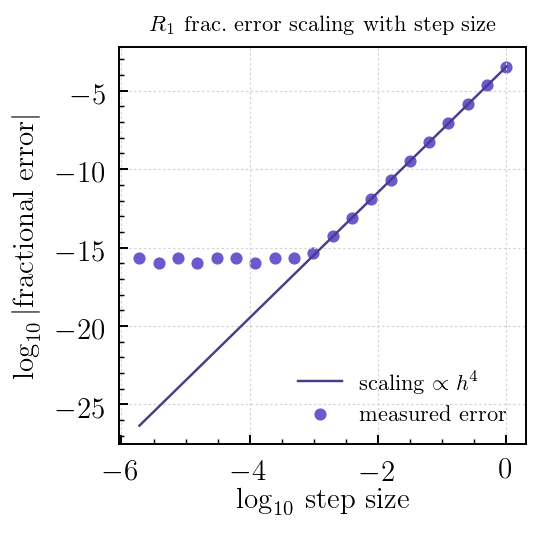

In [78]:
#model is ferr ~ h^n, we normalize it to the size of error for first step size in the sequence:
ferr_model = ferr[0] * (hsteps/hsteps[0])**4

plot_line_points(np.log10(hsteps), np.log10(ferr_model), 
                 xlabel=r'$\log_{10}\,\rm step\ size$', ylabel = r'$\log_{10}\vert\rm fractional\ error\vert$',
                 xp=np.log10(hsteps), yp=np.log10(ferr), points=True, 
                 legend=r'${\rm scaling} \propto h^4$', plegend = r'$\rm measured\ error$',
                 legendloc = 'lower right', 
                 plot_title=r'$R_1\ \rm frac.\ error\ scaling\ with\ step\ size$',
                 grid=True, figsize=3)

In [79]:
def trapzd3(func, a, b, hstep):
    return (16.*trapzd2(func, a, b, 0.5*hstep) - trapzd2(func, a, b, hstep)) / 15.0

In [80]:
ns = 12

trint, hsteps = compute_integral(np.exp, trapzd3, a, b, ns)

ferr3 = np.abs(trint/fexact - 1.)


C:\Users\h2_sf\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


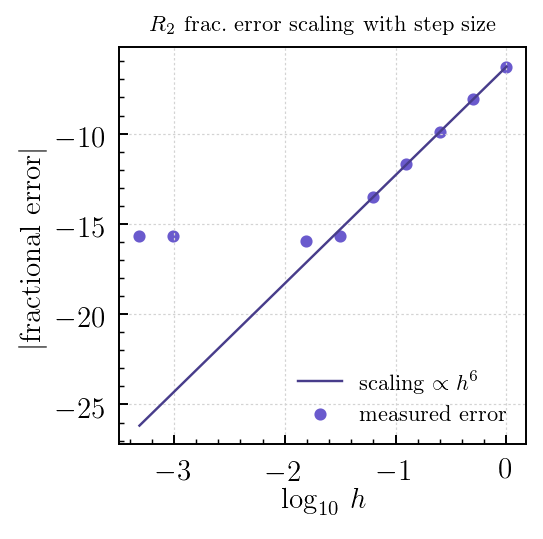

In [82]:
#model is ferr ~ h^2, we normalize it to the size of error for first step size in the sequence:
n = 6
ferr_model = ferr3[0] * (hsteps/hsteps[0])**n

plot_line_points(np.log10(hsteps), np.log10(ferr_model), 
                 xlabel=r'$\log_{10}\,h$', ylabel = r'$\vert\rm fractional\ error\vert$',
                 xp=np.log10(hsteps), yp=np.log10(ferr3), points=True,
                 legend=r'${\rm scaling} \propto h^%d$'%n, plegend = r'$\rm measured\ error$',
                 legendloc = 'lower right', 
                 plot_title=r'$R_2\ \rm frac.\ error\ scaling\ with\ step\ size$',
                 grid=True, figsize=3)

### Truncation error of the trapezoidal scheme

Recall the Taylor expansion of a function  $f(x)$ arond $x_0$:
$$f(x) = \sum\limits^\infty_{n=0} \frac{f^{(n)}(x_0)(x-x_0)^n}{n!}=f(x_0)+f^\prime(x_0)\,(x-x_0)+\frac{1}{2}f^{\prime\prime}(x_0)\,(x-x_0)^2 + \frac{1}{6}f^{\prime\prime\prime}(x_0)\,(x-x_0)^3+ \mathcal{O}[(x-x_0)^4].$$

The term $\mathcal{O}[(x-x_0)^4]$ is the standard shorthand for "and terms of order 4 and higher." If we neglect terms above certain order, we are no longer guaranteed to represent $f(x)$ exactly.

It is possible to use the Taylor expansion to formally derive the trapezoidal integration scheme along with all of its *truncation error terms*. 

The derivation is not too difficult to follow, but it is long and is somewhat tedious. It gives the <a href="https://en.wikipedia.org/wiki/Euler%E2%80%93Maclaurin_formula#Approximation_of_integrals">Euler-Maclaurin formula</a>.

Denoting step size $h=x_{i+1}-x_i$, $x_i=a+ih$, and $f_i=f(x_i)$, $f_{i+1}=f(x_{i+1})$ etc., this formal derivation shows that integral over sub-interval $[x_i,x_{i+1}]$ is

$$
A_i =\int\limits_{x_i}^{x_{i+1}}f(x)dx = \frac{h}{2}\left[f_i+f_{i+1}\right] + \frac{h^2}{12}\,\left[f^{\prime}_i-f^{\prime}_{i+1}\right] -  \frac{h^4}{720}\,\left[f^{\prime\prime\prime}_i-f^{\prime\prime\prime}_{i+1}\right]+\mathcal{O}(h^6). 
$$

Note that the first term corresponds to the evaluation of area in sub-interval using the area of trapezoid, while the rest of the terms contain *only even powers of $h$*.

### Truncation error of the composite trapezoidal integration 

If we now combine the individual areas into total integral (note that $f_0=f(a)$, $f_N=f(b)$, etc.:

$$A = \int\limits_a^b f(x)dx = \sum\limits_{i=0}^{N-1} A_i = \frac{h}{2}\left[f(a)+f(b)\right] + h\sum\limits_{i=1}^{N-1}f_i + \frac{h^2}{12}\,\left[f^{\prime}(a)-f^{\prime}(b)\right] -  \frac{h^4}{720}\,\left[f^{\prime\prime\prime}(a)-f^{\prime\prime\prime}(b)\right]+\mathcal{O}(h^6).
$$

or $A = T(h) +{\rm truncation\ error\ terms\ of\ the\ trapezoidal\ scheme}$. 

Thus, the error of the trapezoidal scheme is

\begin{eqnarray}
\epsilon = T(h)-A &=& \frac{h^2}{12}\,\left[f^{\prime}(a)-f^{\prime}(b)\right] -  \frac{h^4}{720}\,\left[f^{\prime\prime\prime}(a)-f^{\prime\prime\prime}(b)\right]+\mathcal{O}(h^6)\\
&=&e_1h^2 + e_2h^4 + \mathcal{O}(h^6+\ldots +\mathrm{only\ even\ powers\ of\ } h).
\end{eqnarray}

* Note that if the function derivatives of odd orders are equal at the ends of the integration interval: $f^{\prime}(a)=f^{\prime}(b)$, $f^{\prime\prime\prime}(a)=f^{\prime\prime\prime}(b)$ etc., the truncation error is zero! This explains one of the puzzling results we saw in evaluating $\int_0^{2\pi}(1+\sin x)dx$ above. 

Question: For what type of functions and integration interval these conditions will be generically true? 

Answer: periodic functions integrated over a period. In this case, trapezoidal scheme provides result with machine accuracy. 

* If we know analytic expressions for the function derivatives, we can use the above equation (or its full version with all the terms, called the <a href="https://en.wikipedia.org/wiki/Euler%E2%80%93Maclaurin_formula#Approximation_of_integrals">Euler-Maclaurin formula</a>) to compute value integral for such function to machine precision. 

* Even if we don't know the derivatives, the knowledge of the structure of the error terms can be exploited to obtain results of much higher accuracy. This is done in the *Romberg integration method*. 

### Romberg integration method

We showed that the integral can be expressed as  
$$
A=\int\limits^b_af(x)dx=T(h)+ e_1 h^2 + e_2 h^4 + \mathcal{O}(h^6).
$$
but we can also express it using trapezoidal scheme with a twice smaller step size:
$$
A=\int\limits^b_af(x)dx=T\left(\frac{h}{2}\right)+ e_1 \left(\frac{h}{2}\right)^2 + e_2 \left(\frac{h}{2}\right)^4 + \mathcal{O}(h^6)
=T\left(\frac{h}{2}\right)+ \frac{e_1}{4}\,h^2 + \frac{e_2}{16}\,h^4 + \mathcal{O}(h^6).
$$


If we multiply the second equation by 4 and subtract the first equation from the result, we get 

$$3A = 4T\left(\frac{h}{2}\right) - T(h) -\frac{3e_2}{4}\,h^4 + \mathcal{O}(h^6)$$

or 

$$A = \frac{4T\left(h/2\right) - T(h)}{3} -\frac{e_2}{4}\,h^4 + \mathcal{O}(h^6).$$

Let's denote $R_0(h) = T(h)$, the equation above shows that construct

$$R_1(h) =  \frac{4R_0\left(h/2\right) - R_0(h)}{3} = A +\frac{e_2}{4}\,h^4 + \mathcal{O}(h^6),$$

has leading error term of $\propto h^4$ - that is the integration scheme $R_1(h)$ is *4th-order accurate*. 

In fact, $R_1(h)$ scheme is known as the *Simpson integration scheme.* This explains the second puzzling integration accuracy result that we saw. 

We can use the same trick and eliminate the leading truncation error term of $R_1(h)$ as follows:

$$R_2(h) = \frac{16R_1(h/2)-R_1(h)}{15} + e_3h^6 +\mathcal{O}(h^8),$$

which is known as the Boole integration scheme and is *6th order accurate.*

We don't have to stop there and can continue this. After $m$ such steps, the new scheme at a step $m+1$ can be formed as 
$$
R_{m+1}(h)=\frac{4^{m+1} R_{m}(h/2)-R_{m}(h)}{4^{m+1}-1}.
$$

The leading truncation error term of the scheme at step $m$ is $2(m+1)$:

$$A = R_{m}(h) + \mathcal{O}[h^{2(m+1)}].$$

We can thus use this *formula* to compute a series of increasingly accurate integral estimates by computing $R_0$, $R_1$, $R_2$,... up to $R_m$, where $m$ is some number.  

### How do we know when to stop? (i.e. up to what $m$ to compute?)

In general, we do not know what the exact value of the integral, to which we could compare as in the test cases above.

* We may choose to keep increasing $m$ until the fractional difference between $R_m$ and $R_{m-1}$ ($\vert 1-R_{m-1}/R_m\vert$) becomes smaller than $1/2^{52}$. 

* We may choose to keep increasing $m$ until the absolute difference between $R_m$ and $R_{m-1}$ is smaller than some threshold ($\vert R_{m-1}-R_m\vert<\rm atol$) or fractional difference is smaller than some threshold ($\vert 1-R_{m-1}/R_m\vert<\rm rtol$). 

Note that in the latter case we should guard against cases when $R_m=0$. 

This method was proposed for numerical integration by German-Norwegian mathematical physicist <a href="https://en.wikipedia.org/wiki/Werner_Romberg">Werner Romberg</a> (got his PhD in Munich in 1933 working with Arnold Sommerfeld) in 1955, but became popular in 1960s with the spread of computers.  

<center>
<img width=300 src="img/Werner_Romberg.jpg"></img>
Werner Romberg (1909-2003)
</center>

Werner Romberg had an unusual life and career. For political reasons he fled Germany in 1937,
first to Ukraine and then to Norway, where in 1938 he joined the University of Oslo. He spent the war years in
Sweden and then returned to Norway. In 1949 he joined the Norwegian Institute of Technology in Trondheim. He returned to Germany only in 1968, when he took a Professor position at the University of Heidelberg.

The general method of improving accuracy and order of the scheme by eliminating leading truncation error terms was proposed by English mathematician, physicist, meteorologist, psychologist and pacifist Lewis Fry Richardson in 1922, when he attempted pioneering computations of air flows using a system of differential equations for weather prediction. This general approach is known as *Richardson's extrapolation.*
<p>
<center>
<img width=300 src="img/Lewis_Fry_Richardson.png"></img>
Lewis Fry Richardson (1881-1953)
</center>

### Limitations

This is a powerful approach that works in majority of cases one encounters in practice (we mostly deal with reasonably behaving functions), but it has limitations for certain functions.

* The truncation error terms depend on odd derivatives. If any of these are large anywhere in the interval (for example, if function is discontinuous), the accuracy can degrade drastically. 

* It is often possible to split the integration interval around the discontinuous parts and integrate them separately. 

Details depend on specific cases. A general rule is that if you get subpar results with the Romberg integration, examine the function you are integrating (plot it, understand its behavior). You may need to be creative in how to handle integration in such difficult cases. 

### SciPy's integration routine <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romberg.html"><tt>scipy.integrate.romberg</tt></a> 

implements Romberg's integration method. We will use it in calculations below armed with the knowledge of what it actually does. 

You will have an *extra-credit option* to implement your very own Romberg integration routine during the first assignment (will be distributed Friday). 

### Now that we have a working integration routine...
### let's go back to computation of distances in general cosmological models

Cosmological models, in which universe contains only matter derived from the solutions of the Einstein’s equations of GR predict that relation is given by the following formula (<a href="https://ui.adsabs.harvard.edu/abs/1977AmJPh..45..869T">Terrell 1977</a>):

$$d_L = \frac{c}{H_0}\, z\left[1 + \frac{(1-q_0)z}{1+q_0z+\sqrt{1+2q_0z}}\right],$$

where $q_0=\Omega_{m0}/2$ is the *deceleration parameter*. 

In [83]:
clight = 2.99792458e5 # c in km/s

# function that works only for models with OmL = 0
def d_L_simple(z, H0, Om0):
    q0 = 0.5 * Om0
    q0z = q0 * z
    return clight * z/H0 * (1. + (z-q0z) / (1. + q0z + np.sqrt(1. + 2.*q0z)))  

### For models with $\Omega_\Lambda\ne 0$ things are more complicated....

$$d_c =\int\limits_0^z \frac{dz}{E(z)}.$$

where $\Omega_k = 1-\Omega_{\rm m0} - \Omega_\Lambda$ and $E(z)=\sqrt{\Omega_{\rm m0}(1+z)^3+\Omega_k(1+z)^2+\Omega_\Lambda}.$

$$
d_L(z,\Omega_0,\Omega_\Lambda) = \frac{c}{H_0}\,(1+z)\,\left\{
\begin{array}{ll}
\frac{1}{\sqrt{\Omega_k}}\,\sinh\left[\sqrt{\Omega_k}\,d_{\rm c}\right] & {\rm for}~\Omega_k>0 \\
d_{\rm c} & {\rm for}~\Omega_k=0 \\
\frac{1}{\sqrt{|\Omega_k|}}\,\sin\left[\sqrt{|\Omega_k|}\,d_{\rm c}\right] & {\rm for}~\Omega_k<0
\end{array}
\right.
$$


In [84]:
def dl_func(z, H0, Om0, OmL, Omk):
    z1 = 1.0 + z; z12 = z1 * z1
    return 1.0 / np.sqrt(z12*(Om0*z1 + Omk) + OmL)

Adding capability to pass a vector of arguments to the integrand function to trapzd routine using *args.

In [85]:
def trapzd(func, a, b, hstep, *args):
    bma = np.abs(b-a)
            
    nstep = np.int(bma / hstep) 
    if nstep == 1:
        return 0.5*(func(a, *args) + func(b, *args)) * hstep
    else: 
        xd = a + np.arange(nstep) * hstep # np.arange creates a vector of values from 0 to nstep-1
        return (0.5*(func(a, *args) + func(b, *args)) + np.sum(func(xd[1:], *args))) * hstep


In [86]:
def _dc(z1, z2, hstep, *args):
    return trapzd(dl_func, z1, z2, hstep, *args)

In [87]:
def d_L(z, H0, Om0, OmL, hstep=1.e-8):
    if 1.0+OmL == 1.0: # not that I exploit the roundoff error in testing whether OmL is consistent with zero
        return d_L_simple(z, H0, Om0) # if OmL=0, use simple formula without integration
    else: # otherwise use numerical integration to compute distance 
        dH = clight / H0 
        Omk = 1.0 - Om0 - OmL
        args = [H0, Om0, OmL, Omk]
        dc = _dc(0., z, hstep, *args)
        if 1.0 + Omk == 1.0:
            return dH * dc * (1.0 + z)
        else:
            sqrOmk = np.sqrt(np.abs(Omk))
            if Omk > 0.:
                return dH * np.sinh(dc*sqrOmk) * (1.0 + z) / sqrOmk 
            else:
                return dH * np.sin(dc*sqrOmk) * (1.0 + z) / sqrOmk
            
        return dL

### $d_L$ routine from AstroPy to be used for comparison and performance tests

In [88]:
from astropy.cosmology import LambdaCDM
import astropy.units as u

def d_L_astropy(z, H0, Om0, OmL):
    cosmo = LambdaCDM(H0=H0, Om0=Om0, Ode0=OmL)
    return cosmo.luminosity_distance(z=z) / u.Mpc

### $d_L$ routine using <tt>scipy.integrate.romberg</tt> routine

In [110]:
from scipy.integrate import romberg

def d_L_romberg(z, H0, Om0, OmL, atol=1.e-8, rtol=1.e-8):
    if 1.0+OmL == 1.0:
        return d_L_simple(z, H0, Om0)
    else:
        dH = clight / H0 
        Omk = 1.0 - Om0 - OmL
        dc = romberg(dl_func, 0., z, args=(H0, Om0, OmL, Omk), divmax=15, tol=atol, rtol=rtol)
        if 1.0 + Omk == 1.0:
            return dH * dc * (1.0 + z)
        else:
            sqrOmk = np.sqrt(np.abs(Omk))
            if Omk > 0.:
                return dH * np.sinh(dc*sqrOmk) * (1.0 + z) / sqrOmk 
            else:
                return dH * np.sin(dc*sqrOmk) * (1.0 + z) / sqrOmk
            
        return dL

### Computing $d_L$ using trapezoidal integration and AstroPy routine and timing them

In [90]:
import timeit

In [91]:
H0, Om0, OmL = 70., 0.3, 0.7;
z = 2.0

hstep = 1.e-1

tstart = timeit.default_timer()
dLtrap    = d_L(z, H0, Om0, OmL, hstep=hstep)
ttrap = timeit.default_timer() - tstart

tstart = timeit.default_timer()
dLastropy = d_L_astropy(z, H0, Om0, OmL)
tastropy = timeit.default_timer() - tstart 

tstart = timeit.default_timer()
tol = 1.e-2
dLromberg = d_L_romberg(z, H0, Om0, OmL, atol=tol, rtol=tol)
tromberg = timeit.default_timer() - tstart 

print("trapezoidal scheme: d_L(z=%.1f)=%.8g computed in %.3g sec"%(z, dLtrap, ttrap))
print("Romberg scheme: d_L(z=%.1f)=%.8g computed in %.3g sec"%(z, dLromberg, tromberg))
print("astropy:            d_L(z=%.1f)=%.8g computed in %.3g sec"%(z, dLastropy, tastropy))
print("fractional difference = 1-dLtrap/dLastropy = %.4g"%(1.-dLtrap/dLastropy))
print("fractional difference = 1-dLromberg/dLastropy = %.4g"%(1.-dLromberg/dLastropy))

trapezoidal scheme: d_L(z=2.0)=15542.746 computed in 0.000133 sec
Romberg scheme: d_L(z=2.0)=15536.375 computed in 0.000168 sec
astropy:            d_L(z=2.0)=15539.586 computed in 0.00268 sec
fractional difference = 1-dLtrap/dLastropy = -0.0002033
fractional difference = 1-dLromberg/dLastropy = 0.0002066


Now let's use our distance routine to compute distances for a grid of redshifts.

In [92]:
H0, Om0, OmL = 70., 0.3, 0.7 # define parameters of the cosmological model

z = np.linspace(0., 2., 100) # create a grid of redshifts
dL = np.zeros_like(z) # initialize a vector for distances of the lenght of z
hstep = 1.e-3 # set trapezoidal integration step

for i, zd in enumerate(z):
    dL[i] = d_L(zd, H0, Om0, OmL, hstep=hstep)

In [93]:
def read_jla_data(sn_list_name = None):
    """
    read in table with the JLA supernova type Ia sample
    
    Parameters
    ----------
    sn_list_name: str
        path/file name containing the JLA data table in ASCII format
        
    Returns
    -------
    zCMB, mB, emB - numpy float vectors containing 
                       zCMB: SNIa redshifts in the CMB frame
                       mB, emB: apparent B-magnitude and its errors
    """
    zCMB, mB, emB = np.loadtxt(sn_list_name, usecols=(1, 4, 5),  unpack=True)

    return zCMB, mB, emB


### Model $d_L(z, H_0, \Omega_0, \Omega_\Lambda)$ vs supernova type Ia data

Recall from last week that supernovae type Ia are thought to be nearly "standard candles", which means that their intrinsic luminosity is nearly constant for all supernovae. Intrinsic luminosity in astronomy is often measured using absolute magnitude, $M$. 

The *distance modulus* - the difference of the observed *apparent magnitude* and absolute magnitude is a function of distance: 

$$\mu = m - M = 5\log_{10}d_L + 25.$$

Now we can compute $d_L$ for theoretical model and compare it to observed $\mu_{\rm SNIa}=m-\rm const$ of supernovae type Ia, as a function of spectral redshift $z$. 

I.e. we are ready to make a plot similar to the plot I showed you a week ago (from <a href="https://ui.adsabs.harvard.edu/abs/2012ApJ...746...85S/abstract">Suzuki et al. 2012</a>) for <a href="https://en.wikipedia.org/wiki/Type_Ia_supernova">type Ia supernovae</a>.

<br>
<center><img width=1000 src="img/suzuki_etal12_hubble_diagram.png"></img></center>

### Load supernovae type Ia data set that was added to the course repository

The data set is from the study of <a href="https://ui.adsabs.harvard.edu/abs/2014A%26A...568A..22B/abstract">Betoule et al. (2014)</a> and can also be downloaded <a href="http://supernovae.in2p3.fr/sdss_snls_jla/ReadMe.html">here</a>.

In [94]:
zCMB, mB, emB = read_jla_data(sn_list_name = 'data/jla_lcparams.txt')

M0sn = -19.05 # the assumed universal abs. magnitude of supernovae type Ia

mu_snIa = mB - M0sn

### Plot model $\mu=5\log_{10}d_L(z)+25$ vs observational $\mu_{\rm SNIa}$ for type Ia supernovae

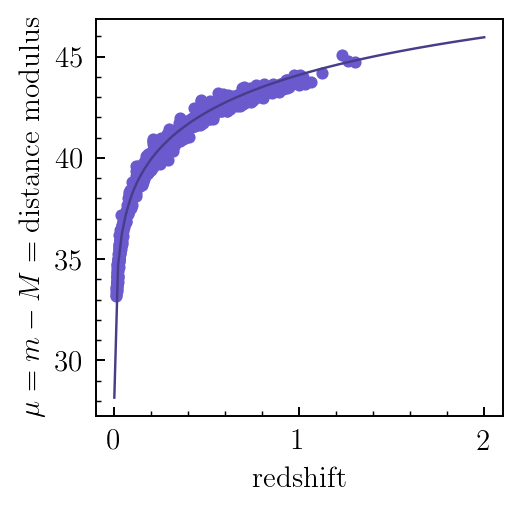

In [96]:
mu_model = 5.0 * np.log10(dL) + 25.0 

plot_line_points(z, mu_model, 
                 xlabel=r'$\rm redshift$', ylabel = r'$\mu=m-M=\rm distance\ modulus$',
                 xp=zCMB, yp=mu_snIa, points=True, figsize=3)

### A more detailed look into performance of our $d_L$ routine vs AstroPy routine

In [121]:
H0, Om0, OmL = 70., 0.3, 0.7;

dL = np.zeros_like(z)

import timeit
tstart = timeit.default_timer()
for i, zd in enumerate(z):
    dL[i] = d_L_romberg(zd, H0, Om0, OmL, atol=1.15e-16, rtol=1.15e-16)
print("Romberg execution time = %.2g sec"%(timeit.default_timer()-tstart))

Romberg execution time = 0.42 sec


In [122]:
tstart = timeit.default_timer()
dummy = d_L_astropy(z,H0,Om0,OmL)
print("AstroPy execution time = %.2g sec"%(timeit.default_timer()-tstart))

AstroPy execution time = 0.00055 sec


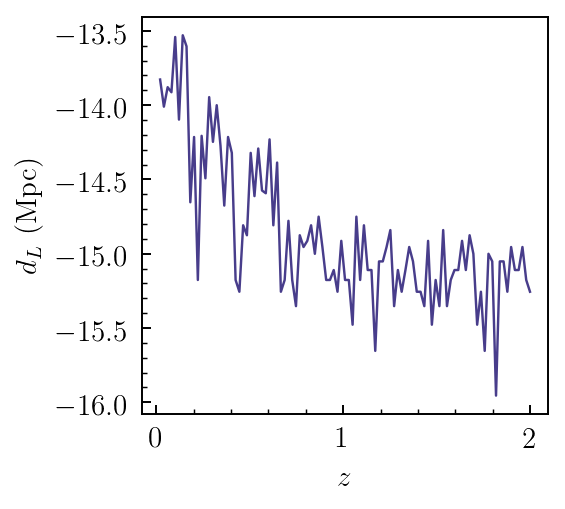

In [123]:

plot_line_points(z, np.log10(np.abs(1.-dL/dummy)), xlabel=r'$z$', ylabel=r'$d_L\ \rm (Mpc)$', figsize=3)

### Try using <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.vectorize.html"><tt>numpy.vectorize</tt></a> function to vectorize computation for a grid of $z$ 

this allows to avoid loop over redshifts

In [124]:
def vectorize_func(func, *x):
    """ Helper function to vectorize function with array inputs"""
    return np.vectorize(func)(*x)


In [125]:
# import quad if the routine below is tested with the quad integration routine used in astropy
#from scipy.integrate import quad
#f = lambda z1, z2: quad(dl_func, z1, z2, args=args)[0]

In [126]:
def _dc(z1, z2, *args, atol=1.e-8, rtol = 1.e-8):
    f = lambda z1, z2: romberg(dl_func, z1, z2, args=args, tol=atol, rtol=rtol)
    if np.size(z1) > 1 or np.size(z2) > 1:
        return vectorize_func(f, z1, z2)
    else:
        return f(z1, z2)

In [127]:
def d_L_vectorized(z, H0, Om0, OmL, atol=1.e-8, rtol=1.e-8):
    if 1.0+OmL == 1.0:
        return d_L_simple(z, H0, Om0)
    else:
        dH = clight / H0 
        Omk = 1.0 - Om0 - OmL
        args = [H0, Om0, OmL, Omk]
        dc = _dc(0., z, *args, atol=atol, rtol=rtol)
        if 1.0 + Omk == 1.0:
            return dH * dc * (1.0 + z)
        else:
            sqrOmk = np.sqrt(np.abs(Omk))
            if Omk > 0.:
                return dH * np.sinh(dc*sqrOmk) * (1.0 + z) / sqrOmk 
            else:
                return dH * np.sin(dc*sqrOmk) * (1.0 + z) / sqrOmk
            
        return dL

In [131]:
tstart = timeit.default_timer()
dL = d_L_vectorized(z, H0, Om0, OmL, atol=1.15e-16, rtol=1.15e-16)
print("vectorized Romberg execution time = %.2g sec"%(timeit.default_timer()-tstart))

vectorized Romberg execution time = 0.11 sec


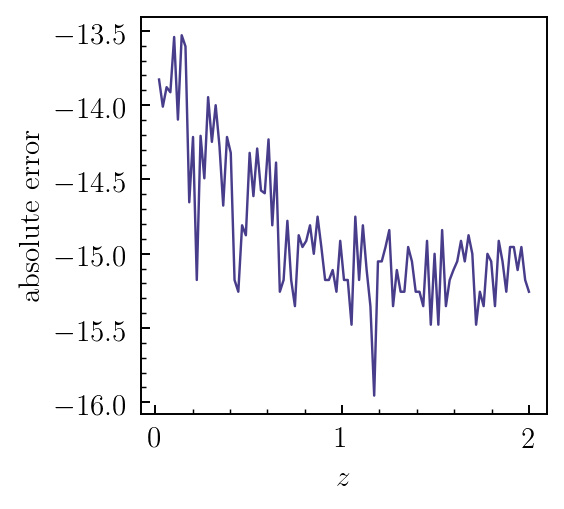

In [133]:
plot_line_points(z, np.log10(np.abs(1.-dL/dummy)), xlabel=r'$z$', ylabel=r'$\rm absolute\ error$', figsize=3)

### Computing $d_L(z,H_0,\Omega_{\rm m0},\Omega_\Lambda)$ for a grid of values of $\Omega_{\rm m0}$ and $\Omega_\Lambda$

In [136]:
nOm0 = 100; nOmL = 100 # construct grids of Om0 and OmL values
Om0min, Om0max = 0., 1
Om0 = np.linspace(Om0min, Om0max, nOm0)
OmLmin, OmLmax = 0., 1
OmL = np.linspace(OmLmin, OmLmax, nOmL)

dLgrid = np.zeros((nOm0, nOmL))

z = 1.0
tstart = timeit.default_timer()
for i, Omd in enumerate(Om0):
    for j, Omld in enumerate(OmL):
            dLgrid[i,j] = d_L_vectorized(z, H0, Omd, Omld)
            
print("execution time = %.8g sec"%(timeit.default_timer()-tstart))


execution time = 1.6134357 sec


In [137]:
from matplotlib import cm

def plot_color_map(data, xlabel = ' ', ylabel = ' ', figsize=3.0, figsave=None):
    plt.figure(figsize=(figsize,figsize))
    plt.xlabel(xlabel); plt.ylabel(ylabel)
    cmap = cm.get_cmap('winter')
    plt.pcolormesh(data, cmap=cmap, rasterized=True)
    if figsave:
        plt.savefig(figsave, bbox_inches='tight')

    plt.show()


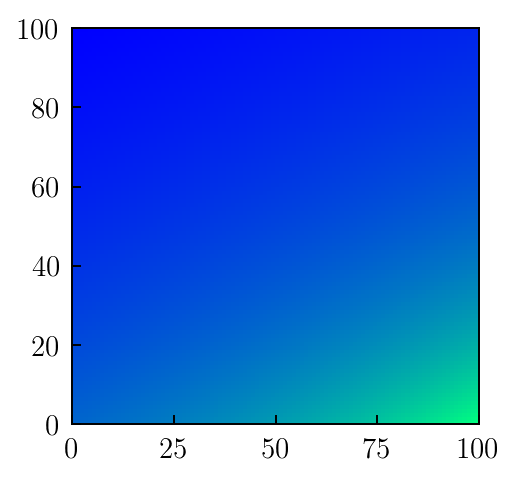

In [139]:
plot_color_map(dLgrid, figsize=3.0)

$\rightarrow$ Dependence of $d_L$ on $\Omega_{\rm m0}$ and $\Omega_\Lambda$ is *very smooth*.

### Approximating functions

Approximating a function that is represented by a finite number of discrete tabulated values or measurements. In each case, there is some uncertainty associated with function values: by *tabulated values* we mean function values computed as accurately as *machine precision* allows. By measurements we mean values of function measured in some way with associated uncertainties usually much larger than the accuracy that is allowed by machine precision. 

### Approximating $d_L$ for faster execution

In [69]:
def plot_points(xp, yp, xlabel =' ', ylabel =' ', figsize=5., figsave=None):
    plt.figure(figsize=(figsize,figsize))
    plt.xlabel(xlabel); plt.ylabel(ylabel)
    plt.scatter(xp, yp, marker=".", lw = 1., c='slateblue')

    if figsave:
        plt.savefig(figsave, bbox_inches='tight')

    plt.show()


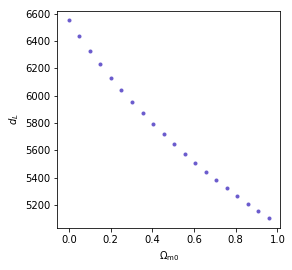

In [71]:
nsOmL = 10 # select tabulated index of specific Omega_Lambda value
nss = 5 # subselect every nss-th tabulated 

# notice the array slicing, ::nss selects every nss-th element of the array
plot_points(Om0[::nss], dLgrid[::nss,nsOmL], xlabel=r'$\Omega_{\rm m0}$', ylabel=r'$d_L$', figsize=4)

### Approximating $d_L(\Omega_{\rm m0})$ using polynomial expansion

denoting $x=\Omega_{\rm m0}$ for convenience: 

$$d_L = \sum\limits_{i=0}^{p}a_i x^i = a_0 + a_1 x + a_2 x^2 +\ldots
$$

In [72]:
# numpy has a routine polyfit that computes coefficients a_i, given the data to fit and order p
porder = 10

polyfit = np.polyfit(Om0[::nss], dLgrid[::nss,nsOmL], porder)
pfit = np.poly1d(polyfit)

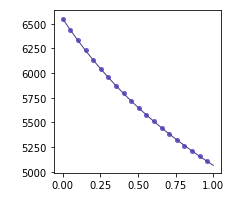

In [74]:
Oma = np.linspace(0., 1., 1000)

plot_line_points(Om0, pfit(Om0), xp=Om0[::nss], yp=dLgrid[::nss,nsOmL], points=True, figsize=3)

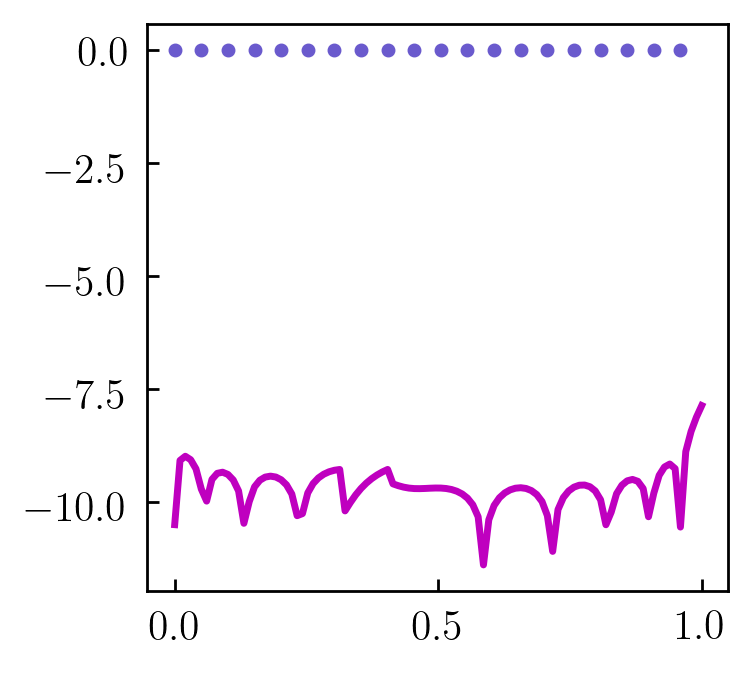

In [123]:
frac_error = np.log10(np.maximum(np.abs(1.0-pfit(Om0)/dLgrid[:,nsOmL]), 2.e-16))

plot_line_plus_points(Om0, frac_error, xp=Om0[::nss], yp=np.zeros_like(Om0[::nss]), points=True, figsize=3)

In [127]:
z = 1.0 
tstart = timeit.default_timer()
Omld = OmL[nsOmL]
for i, Omd in enumerate(Om0):
    dummy = d_L_astropy(z, H0, Omd, Omld)            
print("execution time = %.8g sec"%(timeit.default_timer()-tstart))

%timeit dummy = pfit(Om0)


execution time = 0.0329747 sec
20.4 µs ± 777 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## By the end of the first week. 

* Install full Anaconda Python 3.7 distribution following <a href="http://docs.anaconda.com/anaconda/install/">installation instructions</a> for your OS on your laptop. 

* download the Jupyter notebook with these notes from the <a href="">course GitHub repository</a> (notebook 01_*.ipynb)

* Run Jupyter notebook server <tt>jupyter notebook</tt> and access the l01_approximation.ipynb notebook. Make sure you can run it.  

* Get account on <a href="http://slack.com">Slack</a>, if you don't have one, and email me your user name to be added for access to <a href="https://a211w20.slack.com">Slack workspace</a> for this course.
